---
title: High-dimensional data preparation
teaching: 45
exercises: 2
keypoints:
- ""
objectives:
- "Know how to deal with skewed a target variable, outliers, missing values, and categorical data"
- "Understand the importance of standarizing predictor variables"
questions:
- "How should we prepare a high-dimensional dataset for modeling and analysis?"
---

### Load the data

In [1]:
# See here for thorough documentation regarding the feature set: 
# https://www.openml.org/d/42165
from sklearn.datasets import fetch_openml
housing = fetch_openml(name="house_prices", as_frame=True)

In [2]:
print(f"housing['data'].shape = {housing['data'].shape}\n")

print(f"housing['feature_names'] = {housing['feature_names']}\n")

print(f"housing['target_names'] = {housing['target_names']}\n")

housing['data'].shape = (1460, 80)

housing['feature_names'] = ['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'E

In [3]:
# Extract X and y
X=housing['data']
y=housing['target']


In [4]:
X.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1.0        60.0       RL         65.0   8450.0   Pave  None      Reg   
1  2.0        20.0       RL         80.0   9600.0   Pave  None      Reg   
2  3.0        60.0       RL         68.0  11250.0   Pave  None      IR1   
3  4.0        70.0       RL         60.0   9550.0   Pave  None      IR1   
4  5.0        60.0       RL         84.0  14260.0   Pave  None      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
0         Lvl    AllPub  ...         0.0      0.0   None  None        None   
1         Lvl    AllPub  ...         0.0      0.0   None  None        None   
2         Lvl    AllPub  ...         0.0      0.0   None  None        None   
3         Lvl    AllPub  ...         0.0      0.0   None  None        None   
4         Lvl    AllPub  ...         0.0      0.0   None  None        None   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0     0.0    2.0  2008.0        WD         Normal  
1     0.0    5.0  2007.0        WD         Normal  
2     0.0    9.0  2008.0        WD         Normal  
3     0.0    2.0  2006.0        WD        Abnorml  
4     0.0   12.0  2008.0        WD         Normal  

[5 rows x 80 columns]

#### Plotting the target variable distribution
Explore the distribution of sale prices. Is the distribution uniform or skewed left/right?

Mean Sale Price: 180921.19589041095
Standard Deviation: 79415.29188606751


/usr/local/anaconda3/envs/high_dim_data/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


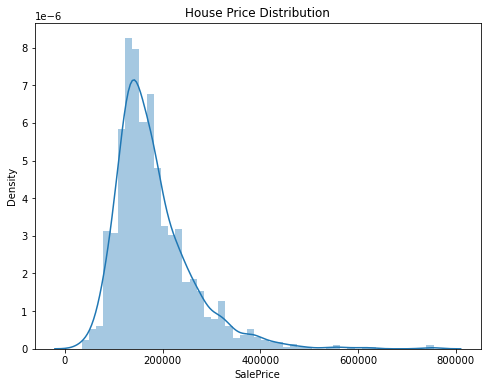

In [5]:
# plot histogram of housing sales, show mean and std of prices as well
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.distplot(y)
title = plt.title('House Price Distribution')
print('Mean Sale Price:', np.mean(y))
print('Standard Deviation:', np.std(y))

#### Skewed Target Variable
This distribution has a long right tail, suggesting that it is skewed. 

Why do we care if the data is skewed? If the response variable is right skewed, the model will be trained on a much larger number of moderately priced homes, and will be less likely to successfully predict the price for the most expensive houses. In addition, the presence of a highly skewed target varible can, more likely, influence the distribution of residuals making them, in turn, non-normal. Normal residuals are required for hypothesis testing.

The concept is the same as training a model on imbalanced categorical classes. If the values of a certain independent variable (feature) are skewed, depending on the model, skewness may violate model assumptions (e.g. logistic regression) or may impair the interpretation of feature importance.

In [6]:
# To quantitatively assess a distribution's skewness, we can use pandas' skew() function
y.skew() 

1.8828757597682129

· If the skewness is between -0.5 and 0.5, the data are fairly symmetrical

· If the skewness is between -1 and — 0.5 or between 0.5 and 1, the data are moderately skewed

· If the skewness is less than -1 or greater than 1, the data are highly skewed

#### Correcting skewed target variable using log transformation
We can correct for a skewed variable by adjusting the scale of the variable. One commonly used rescaling technique that can correct for skew is applying a log transformation. 

/usr/local/anaconda3/envs/high_dim_data/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


12.024050901109373
0.3993150462437029


0.12133506220520406

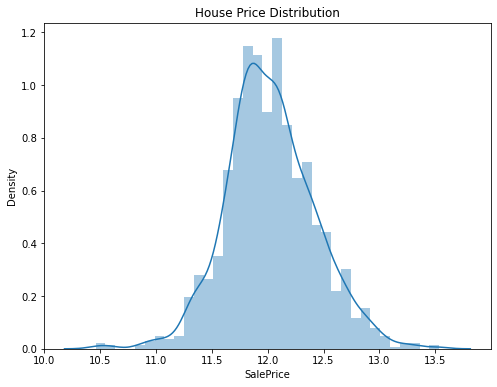

In [7]:
# Correct for skew using log transformation
y = np.log(y)
plt.figure(figsize=(8,6))
sns.distplot(y)
title = plt.title("House Price Distribution")
print(np.mean(y))
print(np.std(y))
y.skew()

Our data now appears to be normal and has a skew value of only .399 — meaning the data is now fairly symmetrical. When we correct the target variable skew using a log transformation but not the predictors, the resulting model fit to this data is a log-linear model, meaning a log dependent variable with linear explanatory variables. 

**Note on other skew correction methods**: While a log transformation is probably the most common way to fix a skewed variable, there are other rescaling methods available to explore, e.g., Box Cox transformation.

#### Skewed Predictor Variables
What happens if our predictor variables are also skewed? Does this have any impact on the model, and should we correct for predictor variable skew?

Technically speaking, the only distributional assumption we have to look out for when doing hypothesis testing with linear models is that the model's residuals are normally distributed. As long as this is true, the underlying independent variable can be as non-normal as you like. However, sometimes the presence of skewed predictors can lead to less stable model predictions because long tails or outliers in the predictor variable distrutions require an analsyis of leverage (i.e. how much these outliers impact on the estimate of the regression coefficients).

Thus, for very skewed variables it might be a good idea to transform the data to eliminate the harmful effects. If there's just a small amount of skew, you likely are fine to move forward with the data as is. We will return to the impact of skewed predictor variables later in the lesson. For now, we will leave all predictor variables as they are.

### Code all nominal and dichotomous variables as "dummy variables" via one-hot encoding

In [8]:
X.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1.0        60.0       RL         65.0   8450.0   Pave  None      Reg   
1  2.0        20.0       RL         80.0   9600.0   Pave  None      Reg   
2  3.0        60.0       RL         68.0  11250.0   Pave  None      IR1   
3  4.0        70.0       RL         60.0   9550.0   Pave  None      IR1   
4  5.0        60.0       RL         84.0  14260.0   Pave  None      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
0         Lvl    AllPub  ...         0.0      0.0   None  None        None   
1         Lvl    AllPub  ...         0.0      0.0   None  None        None   
2         Lvl    AllPub  ...         0.0      0.0   None  None        None   
3         Lvl    AllPub  ...         0.0      0.0   None  None        None   
4         Lvl    AllPub  ...         0.0      0.0   None  None        None   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0     0.0    2.0  2008.0        WD         Normal  
1     0.0    5.0  2007.0        WD         Normal  
2     0.0    9.0  2008.0        WD         Normal  
3     0.0    2.0  2006.0        WD        Abnorml  
4     0.0   12.0  2008.0        WD         Normal  

[5 rows x 80 columns]

In [9]:
from preprocessing import encode_predictors_housing_data
X_encoded = X.copy(deep=True) 
X_encoded = encode_predictors_housing_data(X_encoded)
X_encoded.head()

MasVnrType_BrkCmn  MasVnrType_BrkFace  MasVnrType_None  MasVnrType_Stone  \
0                  0                   1                0                 0   
1                  0                   0                1                 0   
2                  0                   1                0                 0   
3                  0                   0                1                 0   
4                  0                   1                0                 0   

   Utilities_AllPub  Utilities_NoSeWa  SaleCondition_Abnorml  \
0                 1                 0                      0   
1                 1                 0                      0   
2                 1                 0                      0   
3                 1                 0                      1   
4                 1                 0                      0   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  ...  \
0                      0                     0                     0  ...   
1                      0                     0                     0  ...   
2                      0                     0                     0  ...   
3                      0                     0                     0  ...   
4                      0                     0                     0  ...   

   TotalBsmtSF  BsmtHalfBath  1stFlrSF  EnclosedPorch  2ndFlrSF  GarageArea  \
0        856.0           0.0     856.0            0.0     854.0       548.0   
1       1262.0           1.0    1262.0            0.0       0.0       460.0   
2        920.0           0.0     920.0            0.0     866.0       608.0   
3        756.0           0.0     961.0          272.0     756.0       642.0   
4       1145.0           0.0    1145.0            0.0    1053.0       836.0   

   MasVnrArea  HalfBath  Street  CentralAir  
0       196.0       1.0       1           1  
1         0.0       0.0       1           1  
2       162.0       1.0       1           1  
3         0.0       0.0       1           1  
4       350.0       1.0       1           1  

[5 rows x 215 columns]

### Remove columns/predictors that meet any of the following criteria...
* Presence of one or more NaN value (note: interpolation is also an option here)
* Column is a constant or nearly constant (i.e., one value is present across 90% or more of the rows). Constant predictors have no prediction power, and low-variance predictors have very little prediction power.

In [10]:
# Remove variables that have NaNs as observations and vars that have a constant value across all observations
from preprocessing import remove_bad_cols
X_encoded_good = remove_bad_cols(X_encoded, .95)
X_encoded_good.head()


# of columns removed: 133
Columns removed: ['MasVnrType_BrkCmn', 'Utilities_AllPub', 'Utilities_NoSeWa', 'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family', 'RoofStyle_Flat', 'RoofStyle_Gambrel', 'RoofStyle_Mansard', 'RoofStyle_Shed', 'Condition2_Artery', 'Condition2_Feedr', 'Condition2_Norm', 'Condition2_PosA', 'Condition2_PosN', 'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 'Condition1_Artery', 'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAe', 'Condition1_RRAn', 'Condition1_RRNe', 'Condition1_RRNn', 'LandContour_Bnk', 'LandContour_HLS', 'LandContour_Low', 'Alley_Grvl', 'Alley_Pave', 'Exterior1st_AsbShng', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior1st_CemntBd', 'Exterior1st_ImStucc', 'Exterior1st_Stone', 'Exterior1st_Stucco', 'Exterior1st_WdShing', 'Heating_Floor', 'Heating_GasA', 'Heating_GasW', 'Heating_Grav', 'Heating_OthW', 'Heating_Wall', 'LotConfig_FR2', 'LotConfig_FR3', 'Foundation_

MasVnrType_BrkFace  MasVnrType_None  MasVnrType_Stone  \
0                   1                0                 0   
1                   0                1                 0   
2                   1                0                 0   
3                   0                1                 0   
4                   1                0                 0   

   SaleCondition_Abnorml  SaleCondition_Normal  SaleCondition_Partial  \
0                      0                     1                      0   
1                      0                     1                      0   
2                      0                     1                      0   
3                      1                     0                      0   
4                      0                     1                      0   

   RoofStyle_Gable  RoofStyle_Hip  Condition1_Feedr  Condition1_Norm  ...  \
0                1              0                 0                1  ...   
1                1              0                 1                0  ...   
2                1              0                 0                1  ...   
3                1              0                 0                1  ...   
4                1              0                 0                1  ...   

   YearBuilt  LotArea  TotalBsmtSF  BsmtHalfBath  1stFlrSF  EnclosedPorch  \
0     2003.0   8450.0        856.0           0.0     856.0            0.0   
1     1976.0   9600.0       1262.0           1.0    1262.0            0.0   
2     2001.0  11250.0        920.0           0.0     920.0            0.0   
3     1915.0   9550.0        756.0           0.0     961.0          272.0   
4     2000.0  14260.0       1145.0           0.0    1145.0            0.0   

   2ndFlrSF  GarageArea  HalfBath  CentralAir  
0     854.0       548.0       1.0           1  
1       0.0       460.0       0.0           1  
2     866.0       608.0       1.0           1  
3     756.0       642.0       0.0           1  
4    1053.0       836.0       1.0           1  

[5 rows x 82 columns]

**Note**: can replace NaNs with some interpolation instead of dropping columns. Your definition of bad may and possibly should differ!

#### End of data cleaning stage
At this point, we have prepared our X dataframe to contain all independent variables of interest. Our Y variable (pands series object) contains only the response/dependent variable we are trying to predict -- housing prices. 

In [11]:
# quick check of data-types and dimensions post-cleaning efforts
print(X_encoded_good.shape)
print(y.shape)

(1460, 82)
(1460,)


## Train Test Split

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_encoded_good, y, test_size=0.25)

In [13]:
X_train

MasVnrType_BrkFace  MasVnrType_None  MasVnrType_Stone  \
527                    0                0                 1   
624                    0                1                 0   
1119                   0                1                 0   
788                    0                1                 0   
1377                   0                1                 0   
...                  ...              ...               ...   
1004                   1                0                 0   
59                     0                1                 0   
1446                   1                0                 0   
1027                   0                0                 1   
1241                   0                0                 1   

      SaleCondition_Abnorml  SaleCondition_Normal  SaleCondition_Partial  \
527                       0                     0                      1   
624                       0                     1                      0   
1119                      0                     1                      0   
788                       0                     1                      0   
1377                      0                     1                      0   
...                     ...                   ...                    ...   
1004                      0                     1                      0   
59                        0                     1                      0   
1446                      0                     1                      0   
1027                      0                     0                      1   
1241                      0                     0                      1   

      RoofStyle_Gable  RoofStyle_Hip  Condition1_Feedr  Condition1_Norm  ...  \
527                 0              1                 0                1  ...   
624                 1              0                 0                1  ...   
1119                1              0                 0                1  ...   
788                 1              0                 0                1  ...   
1377                1              0                 0                1  ...   
...               ...            ...               ...              ...  ...   
1004                1              0                 0                1  ...   
59                  1              0                 0                1  ...   
1446                1              0                 0                1  ...   
1027                1              0                 0                1  ...   
1241                0              1                 0                1  ...   

      YearBuilt  LotArea  TotalBsmtSF  BsmtHalfBath  1stFlrSF  EnclosedPorch  \
527      2008.0  14948.0       1452.0           0.0    1476.0            0.0   
624      1972.0  10400.0        732.0           0.0    1012.0            0.0   
1119     1959.0   7560.0       1040.0           0.0    1040.0          252.0   
788      1954.0   6000.0        901.0           0.0     901.0            0.0   
1377     1941.0  10998.0        984.0           0.0     984.0            0.0   
...         ...      ...          ...           ...       ...            ...   
1004     2005.0   3182.0       1346.0           0.0    1504.0            0.0   
59       1972.0   7200.0        780.0           0.0     780.0            0.0   
1446     1962.0  26142.0       1188.0           0.0    1188.0            0.0   
1027     2007.0   9520.0       1638.0           0.0    1646.0            0.0   
1241     2007.0   9849.0       1689.0           0.0    1689.0            0.0   

      2ndFlrSF  GarageArea  HalfBath  CentralAir  
527     1237.0       858.0       1.0           1  
624      778.0       484.0       2.0           1  
1119       0.0       286.0       0.0           1  
788        0.0       281.0       0.0           1  
1377     620.0       660.0       0.0           1  
...        ...         ...       ...         ...  
1004       0.0       457.0       0.0           1  
59    

## Use means and stds from training data to zscore test data

In [14]:
import pandas as pd

def zscore(df: pd.DataFrame, train_means: pd.Series, train_stds: pd.Series) -> pd.DataFrame:
    """return a new z-scored dataframe"""
    return (df - train_means) / train_stds


In [15]:
# get means and stds
train_means = X_train.mean()
train_stds = X_train.std()

In [16]:
X_train_z = zscore(df=X_train, train_means=train_means, train_stds=train_stds)
X_test_z = zscore(df=X_test, train_means=train_means, train_stds=train_stds)

X_test_z.head()

MasVnrType_BrkFace  MasVnrType_None  MasVnrType_Stone  \
945            -0.646538         0.838041         -0.332335   
887            -0.646538         0.838041         -0.332335   
1114           -0.646538         0.838041         -0.332335   
478            -0.646538        -1.192169          3.006262   
1256            1.545286        -1.192169         -0.332335   

      SaleCondition_Abnorml  SaleCondition_Normal  SaleCondition_Partial  \
945                -0.27872              0.489767              -0.323803   
887                -0.27872              0.489767              -0.323803   
1114               -0.27872              0.489767              -0.323803   
478                -0.27872              0.489767              -0.323803   
1256               -0.27872              0.489767              -0.323803   

      RoofStyle_Gable  RoofStyle_Hip  Condition1_Feedr  Condition1_Norm  ...  \
945         -1.881577       2.016365         -0.238533          0.38427  ...   
887          0.530984      -0.495489         -0.238533          0.38427  ...   
1114         0.530984      -0.495489         -0.238533          0.38427  ...   
478         -1.881577       2.016365         -0.238533          0.38427  ...   
1256        -1.881577       2.016365         -0.238533          0.38427  ...   

      YearBuilt   LotArea  TotalBsmtSF  BsmtHalfBath  1stFlrSF  EnclosedPorch  \
945   -2.643723 -0.175025     0.080058     -0.234762  0.073058       3.624709   
887   -0.529059  0.712159    -0.533968     -0.234762 -0.738974      -0.373234   
1114  -0.561593 -0.571855    -0.495591     -0.234762 -0.839193      -0.373234   
478    1.162671  0.035806     1.472904     -0.234762  1.435009      -0.373234   
1256   0.739738  0.461181     2.107247     -0.234762  2.126264      -0.373234   

      2ndFlrSF  GarageArea  HalfBath  CentralAir  
945   0.509549   -0.092155 -0.741372    0.261209  
887   0.417883   -0.817961  1.268039    0.261209  
1114 -0.776070   -0.696994 -0.741372    0.261209  
478  -0.776070    1.629307 -0.741372    0.261209  
1256 -0.776070    1.001206 -0.741372    0.261209  

[5 rows x 82 columns]

### plot of distribution before/after

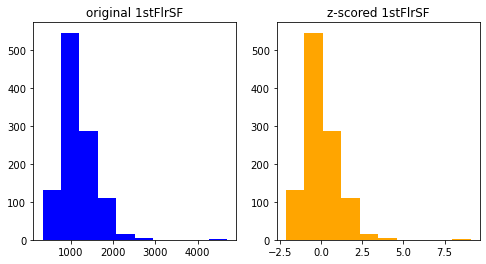

In [17]:
from preprocessing import plot_dist_before_after
plot_dist_before_after(X_train, X_train_z, '1stFlSF')


#### Should we standardize the target variable as well?
In the context of linear modeling using OLS, standardizing the target varible is not necessary. Standardization of target variables is a common practice used when models make use of gradient descent to solve for the model parameters. Gradient descent tends to converge much faster if the target variable has a smaller range. 
